# Start

In [39]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Шлях до папки з зображеннями
folder_path = "C:/Users/Наталія/Downloads/dogs-vs-cats/train/train"

# Список для збереження даних
image_data = {'filename' : [],
              'image': [],
              'class': []}

# Проходимо по всіх файлах у папці
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Задаємо типи файлів
        img_path = os.path.join(folder_path, filename)
        
        # Відкриваємо зображення
        img = Image.open(img_path)
        
        # Конвертуємо зображення в масив NumPy
        img_array = np.array(img)
        
        # Додаємо ім'я файлу та зображення до списку
        image_data['filename'].append(filename)
        image_data['image'].append(img_array)
        image_data['class'].append(1 if 'dog' in filename else 0 )


In [87]:
from PIL import Image

# Задаємо бажаний розмір
target_size = (224, 224)

# Переводимо зображення до однакового розміру
resized_images = []

for img_array in image_data['image']:
    img = Image.fromarray(img_array)  # Перетворюємо в об'єкт Image
    img_resized = img.resize(target_size)  # Змінюємо розмір
    resized_images.append(np.array(img_resized))  # Перетворюємо назад в масив

# Тепер всі зображення мають однаковий розмір
image_data['image'] = resized_images


In [88]:
X = np.array(image_data['image'])
y = np.array(image_data['class'])
X.shape

(25000, 224, 224, 3)

In [89]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перетворення даних у формат зображення (додаємо третє вимірювання - канали)


In [90]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразування цільових міток у категоріальний формат (one-hot encoding)
y_train = to_categorical(y_train, 2)  
y_test = to_categorical(y_test, 2)

print(f"Форма X_train: {X_train.shape}")  # Має бути (N, висота, ширина, канали)
print(f"Форма y_train: {y_train.shape}")  # Має бути (N, 2) через one-hot encoding

Форма X_train: (20000, 224, 224, 3)
Форма y_train: (20000, 2)


In [93]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Ініціалізація моделі
model = Sequential()

# 1-й згортковий шар + pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2-й згортковий шар + pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3-й згортковий шар + pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Перетворення в 1D
model.add(Flatten())

# Повнозв’язний шар
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Запобігає перенавчанню

# Вихідний шар (2 класи: кіт або пес)
model.add(Dense(2, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Налаштування колбеків для зупинки навчання, якщо модель перестане покращуватись
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)

# Навчання моделі
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=10,  
    batch_size = 128, 
    callbacks=[early_stopping, checkpoint]
)

# Оцінка моделі
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Тестова точність: {test_acc:.4f}, {test_loss:.4f}")



Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5450 - loss: 0.9584

157/157 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.5454 - loss: 0.9569 - val_accuracy: 0.6834 - val_loss: 0.5940
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6987 - loss: 0.5830

157/157 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.6988 - loss: 0.5828 - val_accuracy: 0.7446 - val_loss: 0.5155
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7530 - loss: 0.5063

157/157 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.7530 - loss: 0.5063 - val_accuracy: 0.7682 - val_loss: 0.4914
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8019 - loss: 0.4343

157/157 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.8019 - loss: 0.4342 - val_accuracy: 0.7934 - val_loss: 0.4441
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8272 - loss: 0.3889 - val_accuracy: 0.7930 - val_loss: 0.4396
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8518 - loss: 0.3402

157/157 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8518 - loss: 0.3402 - val_accuracy: 0.7990 - val_loss: 0.4755
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8790 - loss: 0.2866

157/157 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.8790 - loss: 0.2867 - val_accuracy: 0.8016 - val_loss: 0.4653
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8984 - loss: 0.2422

157/157 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8984 - loss: 0.2421 - val_accuracy: 0.8116 - val_loss: 0.4446
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9228 - loss: 0.1988

157/157 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9228 - loss: 0.1988 - val_accuracy: 0.8126 - val_loss: 0.4972
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.9371 - loss: 0.1570 - val_accuracy: 0.8088 - val_loss: 0.5748
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 223ms/step - accuracy: 0.7908 - loss: 0.4492
Тестова точність: 0.7930, 0.4396


In [94]:
test_loss

0.43960562348365784

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Ймовірності: [[0.81745946 0.18254052]]
Передбачений клас: Кіт


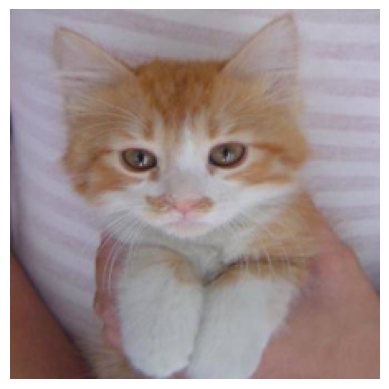

In [102]:
image_path = "C:/Users/Наталія/Downloads/dogs-vs-cats/test1/test1/10012.jpg"
img = Image.open(image_path)
img = img.resize((224, 224))  # Зміна розміру під модель

# Перетворюємо зображення у масив NumPy
img_array = np.array(img) / 255.0  # Нормалізація

# Додаємо batch dimension (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Робимо передбачення
predictions = model.predict(img_array)

# Виводимо результат
predicted_class = np.argmax(predictions)  # 0 = кіт, 1 = пес
class_name = "Пес" if predicted_class == 1 else "Кіт"

print(f"Ймовірності: {predictions}")
print(f"Передбачений клас: {class_name}")

import matplotlib.pyplot as plt
plt.imshow(img)  # Відображаємо зображення в Jupyter
plt.axis("off")  # Ховаємо осі координат
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Ймовірності: [[0.12683043 0.87316954]]
Передбачений клас: Пес


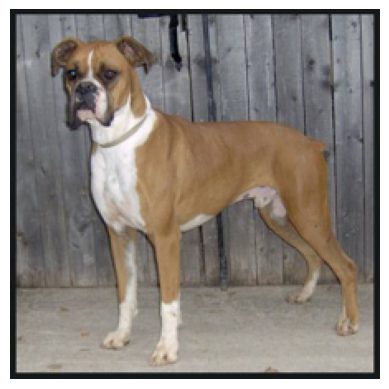

In [103]:
image_path = "C:/Users/Наталія/Downloads/dogs-vs-cats/test1/test1/1232.jpg"
img = Image.open(image_path)
img = img.resize((224, 224))  # Зміна розміру під модель

# Перетворюємо зображення у масив NumPy
img_array = np.array(img) / 255.0  # Нормалізація

# Додаємо batch dimension (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Робимо передбачення
predictions = model.predict(img_array)

# Виводимо результат
predicted_class = np.argmax(predictions)  # 0 = кіт, 1 = пес
class_name = "Пес" if predicted_class == 1 else "Кіт"

print(f"Ймовірності: {predictions}")
print(f"Передбачений клас: {class_name}")

import matplotlib.pyplot as plt
plt.imshow(img)  # Відображаємо зображення в Jupyter
plt.axis("off")  # Ховаємо осі координат
plt.show()

Але трапляється і таке:

In [96]:
image_path = "C:/Users/Наталія/Downloads/dogs-vs-cats/test1/test1/9894.jpg"
img = Image.open(image_path)
img = img.resize((224, 224))  # Зміна розміру під модель

# Перетворюємо зображення у масив NumPy
img_array = np.array(img) / 255.0  # Нормалізація

# Додаємо batch dimension (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Робимо передбачення
predictions = model.predict(img_array)

# Виводимо результат
predicted_class = np.argmax(predictions)  # 0 = кіт, 1 = пес
class_name = "Пес" if predicted_class == 1 else "Кіт"

print(f"Ймовірності: {predictions}")
print(f"Передбачений клас: {class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Ймовірності: [[0.40550143 0.5944986 ]]
Передбачений клас: Пес


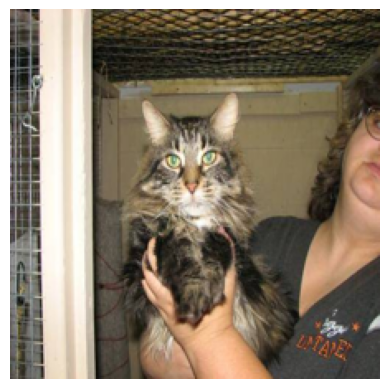

In [101]:
import matplotlib.pyplot as plt
plt.imshow(img)  # Відображаємо зображення в Jupyter
plt.axis("off")  # Ховаємо осі координат
plt.show()

This is due to a not very low loss function on the test data and not high enough accuracy.